In [16]:
import pandas as pd
import numpy as np
import altair as alt
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import json
from sklearn.preprocessing import LabelEncoder

Analyzing Customers.csv dataset

In [2]:
customers=pd.read_csv('dataset/Customers.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
customers['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [4]:
customers = customers.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\paltu\AppData\Local\Temp\ipykernel_32\1692383281.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customers = customers.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [7]:
customers['Year'] = customers['SignupDate'].dt.year
customers['Month'] = customers['SignupDate'].dt.month

In [8]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate,Year,Month
0,c0001,lawrence carroll,south america,2022-07-10,2022,7
1,c0002,elizabeth lutz,asia,2022-02-13,2022,2
2,c0003,michael rivera,south america,2024-03-07,2024,3
3,c0004,kathleen rodriguez,south america,2022-10-09,2022,10
4,c0005,laura weber,asia,2022-08-15,2022,8


In [9]:
customers.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
Year              3
Month            12
dtype: int64

In [14]:
grouped_df = customers.groupby(['Region', 'Year','Month']).size().reset_index(name='CustomerCount')

print(grouped_df.to_markdown(index=False, numalign="left", stralign="left"))

| Region        | Year   | Month   | CustomerCount   |
|:--------------|:-------|:--------|:----------------|
| asia          | 2022   | 2       | 3               |
| asia          | 2022   | 3       | 3               |
| asia          | 2022   | 4       | 1               |
| asia          | 2022   | 6       | 1               |
| asia          | 2022   | 8       | 2               |
| asia          | 2022   | 9       | 1               |
| asia          | 2022   | 10      | 1               |
| asia          | 2022   | 11      | 1               |
| asia          | 2023   | 1       | 1               |
| asia          | 2023   | 2       | 2               |
| asia          | 2023   | 4       | 1               |
| asia          | 2023   | 5       | 2               |
| asia          | 2023   | 6       | 1               |
| asia          | 2023   | 7       | 1               |
| asia          | 2023   | 9       | 1               |
| asia          | 2023   | 10      | 4               |
| asia    

In [15]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         106 non-null    object
 1   Year           106 non-null    int32 
 2   Month          106 non-null    int32 
 3   CustomerCount  106 non-null    int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 2.6+ KB


In [17]:
def create_bar_chart(df: pd.DataFrame, year: int) -> alt.Chart:

  df = df[df['Year'] == year]
  chart = alt.Chart(df).mark_bar().encode(
      x=alt.X('Month:O'),
      y=alt.Y('CustomerCount:Q'),
      color='Region',
      tooltip=['Month', 'Region', 'CustomerCount']
  ).properties(title=f'Number of Customers for each Region and Month in {year}').interactive()

  return chart

In [18]:
chart_2022 = create_bar_chart(grouped_df, 2022)
chart_2022.display()

d:\anacondawala\envs\meraVm_env\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [19]:
chart_2023 = create_bar_chart(grouped_df, 2023)
chart_2023.display()

d:\anacondawala\envs\meraVm_env\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [20]:
chart_2024 = create_bar_chart(grouped_df, 2024)
chart_2024.display()

d:\anacondawala\envs\meraVm_env\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [21]:
result = grouped_df.groupby(['Region', 'Year'])['CustomerCount'].sum().reset_index()

result

,Region,Year,CustomerCount
0,asia,2022,13
1,asia,2023,16
2,asia,2024,16
3,europe,2022,16
4,europe,2023,19
5,europe,2024,15
6,north america,2022,10
7,north america,2023,8
8,north america,2024,28
9,south america,2022,25


Analyzing Products.csv dataset

In [22]:
products=pd.read_csv('dataset/Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [23]:
products = products.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\paltu\AppData\Local\Temp\ipykernel_32\3600018754.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  products = products.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [24]:
categories = products.groupby("Category")

results = {}

for category, group in categories:
    total_products = group["ProductID"].count()
    total_price = group["Price"].sum()
    average_price = group["Price"].mean()
    
    results[category] = {
        "Total Products": total_products,
        "Total Price": total_price,
        "Average Price": average_price,
        "Products": group
    }

max_category = max(results, key=lambda x: results[x]["Total Products"])

for category, stats in results.items():
    print(f"Category: {category}")
    print(f"Total Products: {stats['Total Products']}")
    print(f"Total Price: {stats['Total Price']:.2f}")
    print(f"Average Price: {stats['Average Price']:.2f}")
    print(f"Products:\n{stats['Products']}\n")

print(f"The category with the maximum products is: {max_category} with {results[max_category]['Total Products']} products.")


Category: books
Total Products: 26
Total Price: 7597.52
Average Price: 292.21
Products:
   ProductID                 ProductName Category   Price
0       p001        activewear biography    books  169.30
2       p003     comfortliving biography    books   44.12
6       p007          soundwave cookbook    books  420.15
16      p017         activewear textbook    books  469.77
17      p018  comfortliving mystery book    books  436.89
23      p024          soundwave cookbook    books  338.66
29      p030         activewear cookbook    books  277.86
31      p032          bookworld cookbook    books  488.63
39      p040      soundwave mystery book    books  153.19
42      p043             soundwave novel    books  404.40
47      p048            techpro cookbook    books  416.40
48      p049            techpro textbook    books  147.95
53      p054          soundwave cookbook    books   57.30
54      p055         bookworld biography    books  128.53
57      p058         activewear textbook  

In [25]:
for category, stats in results.items():
    print(f"Category: {category}")
    products_by_name = stats["Products"].groupby("ProductName")
    for product_name, product_group in products_by_name:
        print(f"  Product Name: {product_name}")
        print(f"  Count: {product_group['ProductID'].count()}")
        print(f"  Total Price: {product_group['Price'].sum():.2f}")


Category: books
  Product Name: activewear biography
  Count: 1
  Total Price: 169.30
  Product Name: activewear cookbook
  Count: 1
  Total Price: 277.86
  Product Name: activewear textbook
  Count: 2
  Total Price: 627.39
  Product Name: bookworld biography
  Count: 3
  Total Price: 645.69
  Product Name: bookworld cookbook
  Count: 2
  Total Price: 807.97
  Product Name: comfortliving biography
  Count: 2
  Total Price: 209.42
  Product Name: comfortliving mystery book
  Count: 1
  Total Price: 436.89
  Product Name: homesense novel
  Count: 1
  Total Price: 374.16
  Product Name: soundwave cookbook
  Count: 3
  Total Price: 816.11
  Product Name: soundwave mystery book
  Count: 2
  Total Price: 507.48
  Product Name: soundwave novel
  Count: 2
  Total Price: 845.10
  Product Name: soundwave textbook
  Count: 1
  Total Price: 337.22
  Product Name: techpro cookbook
  Count: 1
  Total Price: 416.40
  Product Name: techpro novel
  Count: 2
  Total Price: 480.82
  Product Name: techpro

In [26]:
for category, stats in results.items():
    print(f"Category: {category}")
    products_by_name = stats["Products"].groupby("ProductName")
    
    max_product_name = None
    max_count = 0
    max_total_price = 0.0
    
    for product_name, product_group in products_by_name:
        count = product_group['ProductID'].count()
        total_price = product_group['Price'].sum()
        
        if count > max_count:
            max_count = count
            max_product_name = product_name
            max_total_price = total_price
            
        print(f"  Product Name: {product_name}")
        print(f"  Count: {count}")
        print(f"  Total Price: {total_price:.2f}")
    
    print(f"\n  The product with the maximum count in {category} is: {max_product_name} with {max_count} products.")
    print(f"  Total Price for {max_product_name}: {max_total_price:.2f}\n")


Category: books
  Product Name: activewear biography
  Count: 1
  Total Price: 169.30
  Product Name: activewear cookbook
  Count: 1
  Total Price: 277.86
  Product Name: activewear textbook
  Count: 2
  Total Price: 627.39
  Product Name: bookworld biography
  Count: 3
  Total Price: 645.69
  Product Name: bookworld cookbook
  Count: 2
  Total Price: 807.97
  Product Name: comfortliving biography
  Count: 2
  Total Price: 209.42
  Product Name: comfortliving mystery book
  Count: 1
  Total Price: 436.89
  Product Name: homesense novel
  Count: 1
  Total Price: 374.16
  Product Name: soundwave cookbook
  Count: 3
  Total Price: 816.11
  Product Name: soundwave mystery book
  Count: 2
  Total Price: 507.48
  Product Name: soundwave novel
  Count: 2
  Total Price: 845.10
  Product Name: soundwave textbook
  Count: 1
  Total Price: 337.22
  Product Name: techpro cookbook
  Count: 1
  Total Price: 416.40
  Product Name: techpro novel
  Count: 2
  Total Price: 480.82
  Product Name: techpro

Analyzing Transactions.csv dataset

In [27]:
transactions=pd.read_csv('dataset/Transactions.csv')

In [28]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [29]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], dayfirst=True)
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

result = transactions.groupby(['Year', 'ProductID']).agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

max_sales_per_year = result.loc[result.groupby('Year')['TotalSales'].idxmax()]

print(max_sales_per_year)

    Year ProductID  TotalSales
0   2023      P020     1585.36
32  2024      P029    19513.80


C:\Users\paltu\AppData\Local\Temp\ipykernel_32\130876331.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], dayfirst=True)


In [30]:
result

,Year,ProductID,TotalSales
0,2023,P020,1585.36
1,2023,P057,958.80
2,2023,P061,313.92
3,2023,P083,911.44
4,2024,P001,3047.40
...,...,...,...
99,2024,P096,10453.98
100,2024,P097,7983.50
101,2024,P098,4798.88
102,2024,P099,3897.19


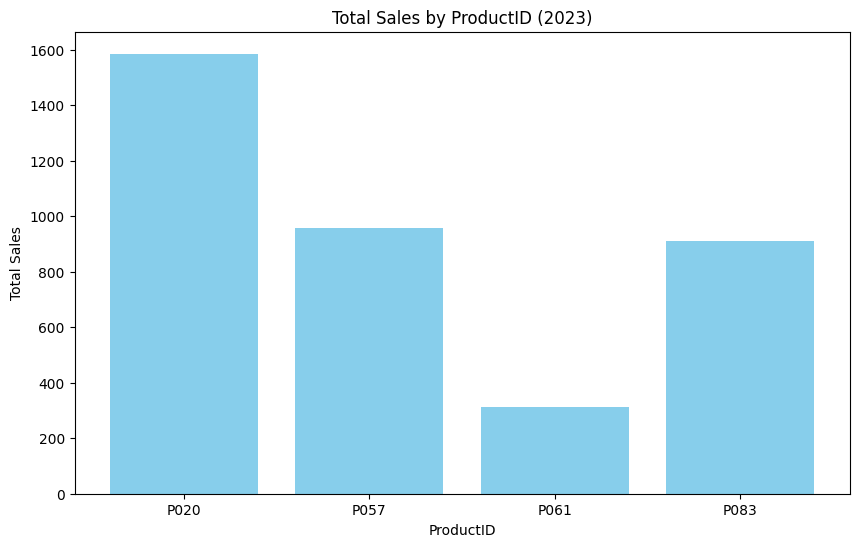

In [ ]:
df_2023 = result[result["Year"] == 2023]
df_2024 = result[result["Year"] == 2024]


plt.figure(figsize=(10, 6))
plt.bar(df_2023["ProductID"], df_2023["TotalSales"], color="skyblue")
plt.title("Total Sales by ProductID (2023)")
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.show()



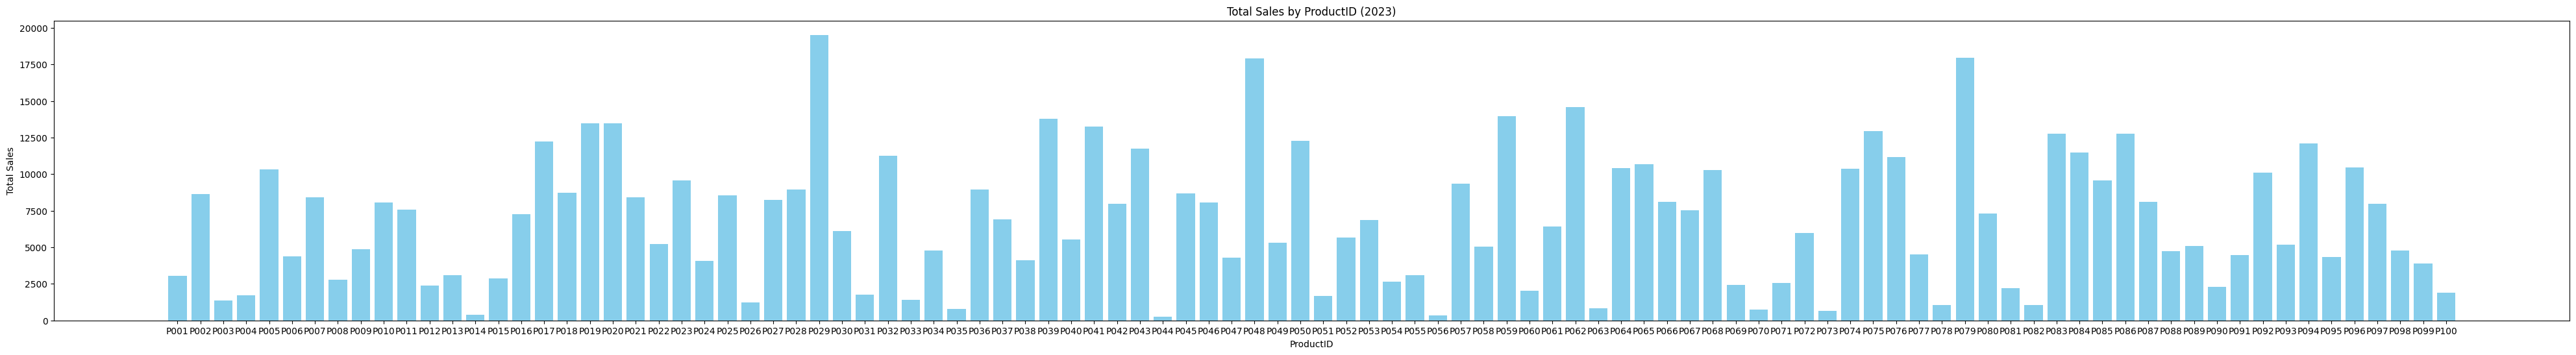

In [39]:
plt.figure(figsize=(50, 6))
plt.bar(df_2024["ProductID"], df_2024["TotalSales"], color="skyblue")
plt.title("Total Sales by ProductID (2023)")
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.show()


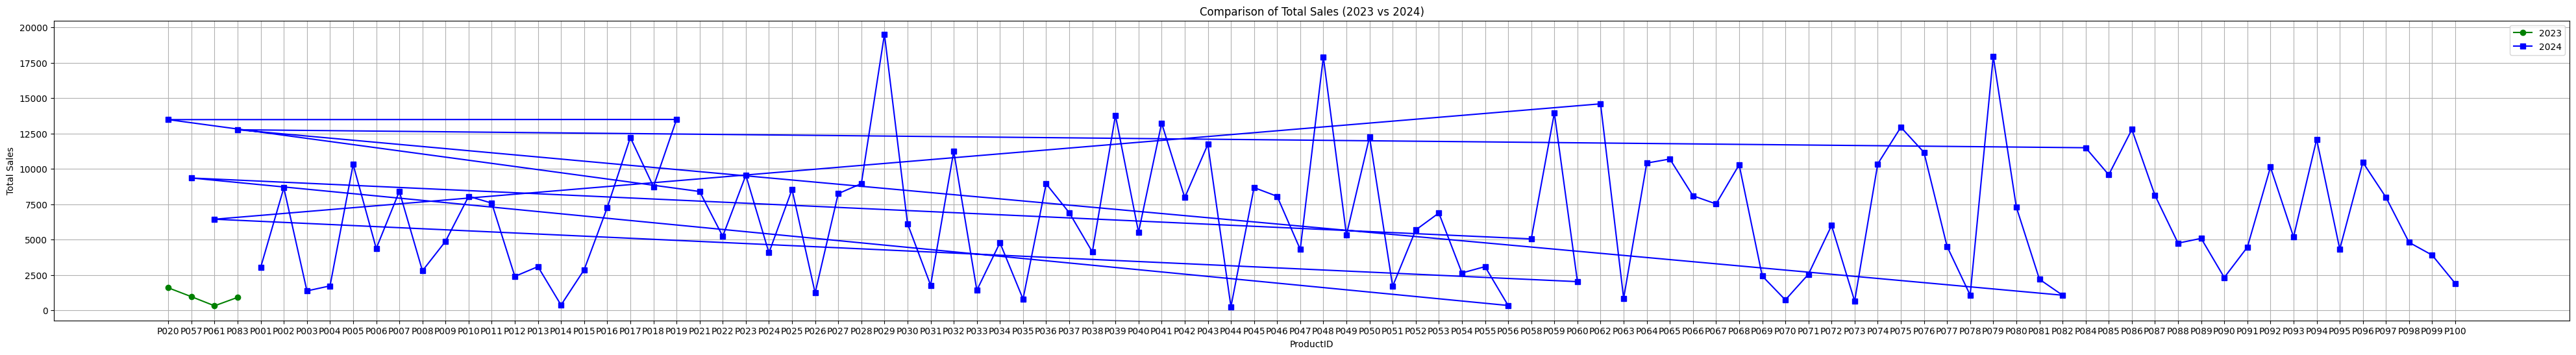

In [ ]:
plt.figure(figsize=(50, 6))
plt.plot(df_2023["ProductID"], df_2023["TotalSales"], marker='o', label="2023", color="green")
plt.plot(df_2024["ProductID"], df_2024["TotalSales"], marker='s', label="2024", color="blue")
plt.title("Comparison of Total Sales (2023 vs 2024)")
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()